<a href="https://colab.research.google.com/github/syamsulrizal123/TA_Covid19/blob/main/template_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
ls

'1101170108 a.razaq galang triansyah no 3.1 tt-41-07.pdf'
'1101170108 arazaq galang ts no2.pdf'
'11101170108 a.razaq galang triansyah no 1 dan 4 tt4107.pdf'
 18281.jpg
 215746.jpg
'215916 (1).jpg'
 215916.jpg
 215917.jpg
 Adamax/
 adamCLAHEnewlr-e4/
'a.razaq galang triansyah s-1101170108-no2.jpg'
'a.razaq galang triansyah s-1101170108-no3.jpg'
'a.razaq galang triansyah s._1101170108_tubes kodkom.rar'
 best_weight_vgg16_1.h5
 bw_adam2lr1e-4new.h5
 bw_adam3lr1e-4new.h5
 bw_adamClahe_lr1e-4new.h5
 bw_adamgaussian_lr1e-4new.h5
 bw_adam_lr1e-4new.h5
 bw_clahe12r1e-4new.h5
 bw_clahe1_lr1e-4new.h5
 bw_clahelr1e-4new.h5
 bw_gauss-4new.h5
 bw_gaussclahe-4new.h5
 bw_gaussian1_lr1e-4new.h5
 bw_gaussianclahe1_lr1e-4new.h5
 CLahe/
 CLahe2/
 CLahegaussian/
 Classroom/
'Colab Notebooks'/
 COVID-CTset.zip
 CSV@
'CSV (1)'@
 dataset/
 gaussianClahe/
 gaussianCLahe/
'gaussianclahe model'/
'gaussian model'/
'Getting started.pdf'
'hasil test'@
'Meet Recordings'/
'new CLAHE'/
'new clahegaussian'/
 new_datat

In [ ]:
# import the necessary packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop, Nadam, Adamax
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage import exposure
import cv2
import pandas as pd
from sklearn.utils import shuffle
import zipfile
import numpy as np
from PIL import Image as pil_image
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install zipfile36


In [ ]:
archive = zipfile.ZipFile('/content/drive/MyDrive/Train&Validation.zip') #Path to the shared data for training and validation
for file in archive.namelist():
     archive.extract(file, '/content/drive/MyDrive/new_datatest') #Extract the data

In [ ]:
cd /content/drive/MyDrive/new_datatest/

/content/drive/MyDrive/new_datatest


In [ ]:
import os, sys
from PIL import Image

size=(224,224)
for infile in os.listdir():
    outfile=os.path.splitext(infile)[0]
    try:
        with Image.open(infile) as im:
  
             
           array=np.array(im)
           max_val=np.amax(array)
           normalized=(array/max_val)
           im = pil_image.fromarray(normalized)
           im.convert('RGB')
           im.thumbnail(size)
           im.save("/content/drive/MyDrive/new gaussian/" + infile, "TIFF")
    except OSError:
        pass
print("ok")

In [ ]:
cd /content/drive/MyDrive/new gaussian/

/content/drive/MyDrive/new gaussian


In [ ]:
size=(224,224)

for infile in os.listdir():
    outfile=os.path.splitext(infile)[0]
    try:
        with Image.open(infile) as im:
            
            array=np.array(im)
            gausfilter = gaussian(array, sigma=1, mode='constant', cval=0.0)
            im = pil_image.fromarray(gausfilter)
            im.convert('RGB')
            im.thumbnail(size)
            im.save("/content/drive/MyDrive/new gaussian/" + infile, "TIFF")
    except OSError:
        pass
print("ok")

ok


In [ ]:
size=(224,224)

for infile in os.listdir():
    outfile=os.path.splitext(infile)[0]
    try:
        with Image.open(infile) as im:
            
            array=np.array(im)/255
            clahe = exposure.equalize_adapthist(array)
            im = pil_image.fromarray(clahe)
            im.convert('RGB')
            im.thumbnail(size)
            im.save("//content/drive/MyDrive/new clahegaussian/" + infile, "TIFF")
    except OSError:
        pass
print("ok")

ok


In [ ]:
fold_num=1 #Select Fold Number

In [ ]:
train_datagen = ImageDataGenerator()#horizontal_flip=True,vertical_flip=True,zoom_range=0.05,rotation_range=360,width_shift_range=0.05,height_shift_range=0.05,shear_range=0.05)
test_datagen = ImageDataGenerator()
trainval_df =pd.read_csv('/content/drive/MyDrive/CSV/train{}.csv'.format(fold_num)) #raed train csv file
trainval_df = shuffle(trainval_df) #Shuffle the train data
test_df = pd.read_csv('/content/drive/MyDrive/CSV/test{}.csv'.format(fold_num))#raed test csv file (For evaluating the final version of th

In [ ]:
# generating one row 
trainval_df = trainval_df.sample(n =1900, random_state=1)
    
# display
trainval_df

,filename,class
2193,cdunnormal_patient158_SR_2_IM00021.tif,normal
2661,normal1_patient175_SR_2_IM00011.tif,normal
71,137covid_patient31_SR_2_IM00030.tif,covid
1544,137covid_patient78_SR_4_IM00175.tif,covid
1087,137covid_patient84_SR_3_IM00015.tif,covid
...,...,...
1941,cdnormal4_patient150_SR_2_IM00033.tif,normal
2638,normal1_patient174_SR_2_IM00010.tif,normal
1097,137covid_patient85_SR_3_IM00030.tif,covid
3533,normal4_patient188_SR_2_IM00035.tif,normal


In [ ]:
trainval_df.groupby('class').count()

,filename
class,
covid,944
normal,956


In [ ]:
test_df = test_df.drop(test_df[test_df['class']=='normal'].sample(frac =.94).index)

In [ ]:
# generating one row
test_df = test_df.sample(n =200, random_state=1)
    
# display
test_df

,filename,class
363,137covid_patient115_SR_4_IM00004.tif,covid
41,137covid_patient10_SR_2_IM00024.tif,covid
6843,normal5_patient383_SR_2_IM00022.tif,normal
1789,normal1_patient241_SR_2_IM00010.tif,normal
35,137covid_patient10_SR_2_IM00015.tif,covid
...,...,...
5363,normal4_patient216_SR_2_IM00019.tif,normal
354,137covid_patient105_SR_4_IM00121.tif,covid
6492,normal4_patient376_SR_2_IM00027.tif,normal
241,137covid_patient118_SR_3_IM00014.tif,covid


In [ ]:

test_df.groupby('class').count()

,filename
class,
covid,93
normal,107


In [ ]:
shape=(224,224,3) #shape of the dataset images (in TIFF format)

In [ ]:
#Create the generators
train_generator = train_datagen.flow_from_dataframe(
      dataframe=trainval_df,
      directory='/content/drive/MyDrive/new CLAHE/',
      x_col="filename",
      y_col="class",
      target_size=shape[:2],
      batch_size=32,
      class_mode='categorical',color_mode="rgb",shuffle=True)

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory='/content/drive/MyDrive/new CLAHE/',
        x_col="filename",
        y_col="class",
        target_size=shape[:2],
        batch_size=32,
        class_mode='categorical',color_mode="rgb",shuffle=True)

Found 1900 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [ ]:
data = []
for num,img_name in enumerate(train_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('/content/drive/MyDrive/new CLAHE/',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    data.append(img)

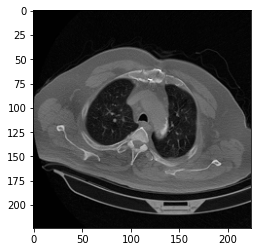

In [ ]:
plt.imshow(data[1])

In [ ]:
data = np.array(data)
data.shape

(1900, 224, 224, 3)

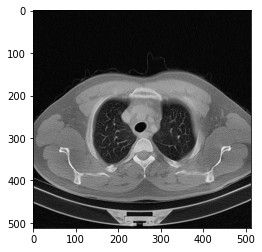

In [ ]:
plt.imshow(im_rgb)


covid


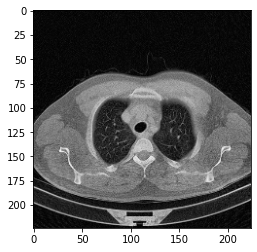

In [ ]:

print(labels[0])
plt.imshow(data[0])

In [ ]:
from sklearn.model_selection import train_test_split
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(train_generator.classes), test_size=0.25)
#trainY = np.asarray(trainY).astype('float32').reshape((-1,1))
#testY = np.asarray(testY).astype('float32').reshape((-1,1))
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1425, 224, 224, 3)
(475, 224, 224, 3)
(1425,)
(475,)


In [ ]:
print(labels)

In [ ]:
print(trainX[4])

[[[0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  ...
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]]

 [[0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  ...
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]]

 [[0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  ...
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]]

 ...

 [[0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  ...
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]]

 [[0.00642752 0.00642752 0.00642752]
  [0.00642752 0.00642752 0.00642752]


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.regularizers import l2


In [ ]:
base_model = VGG16(include_top=False, input_shape=(224,224,3), )
x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dropout(0.5)(x)
x = BatchNormalization() (x)
x = Dense(4096, activation='relu') (x)
x = Dense(2048, activation='relu') (x)
out = Dense(2, activation='softmax') (x)

model = Model(inputs = base_model.input, outputs = out)
model.summary()


58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint('bw_clahe1_lr1e-4new.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop,Nadam, Adamax
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(learning_rate=1e-4, decay=1e-6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[ checkpoint])

[INFO] training network...
Epoch 1/50
45/45 [==============================] - 21s 434ms/step - loss: 0.7158 - accuracy: 0.4661 - val_loss: 0.7061 - val_accuracy: 0.5137

Epoch 00001: val_accuracy improved from -inf to 0.51368, saving model to bw_clahe1_lr1e-4new.h5
Epoch 2/50
45/45 [==============================] - 19s 425ms/step - loss: 0.7043 - accuracy: 0.4952 - val_loss: 0.6916 - val_accuracy: 0.5600

Epoch 00002: val_accuracy improved from 0.51368 to 0.56000, saving model to bw_clahe1_lr1e-4new.h5
Epoch 3/50
45/45 [==============================] - 19s 430ms/step - loss: 0.7254 - accuracy: 0.4743 - val_loss: 0.6903 - val_accuracy: 0.5389

Epoch 00003: val_accuracy did not improve from 0.56000
Epoch 4/50
45/45 [==============================] - 20s 436ms/step - loss: 0.7065 - accuracy: 0.5056 - val_loss: 0.6807 - val_accuracy: 0.5474

Epoch 00004: val_accuracy did not improve from 0.56000
Epoch 5/50
45/45 [==============================] - 20s 441ms/step - loss: 0.6866 - accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


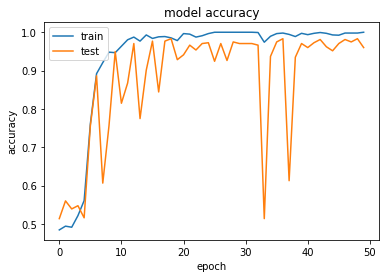

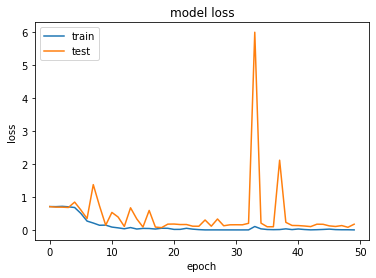

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(testX, batch_size=32)


NameError: ignored

In [ ]:
print(predictions.argmax(axis=1))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY,predictions.argmax(axis=1),target_names = train_generator.class_indices))

NameError: ignored

In [ ]:
cf_matrix = confusion_matrix(testY,predictions.argmax(axis=1))
print(cf_matrix)

[[209  11]
 [  0 255]]


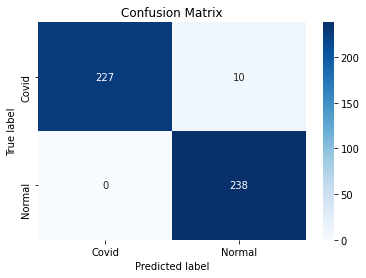

In [ ]:
cm = cf_matrix
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

In [ ]:
data2 = []
for num,img_name in enumerate(test_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('/content/drive/MyDrive/new CLAHE/',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    data2.append(img)

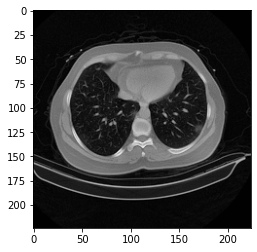

In [ ]:
plt.imshow(data2[1])


In [ ]:

valX, valY = np.array(data2), np.array(test_generator.classes)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(valX, batch_size=32)
print(classification_report(valY,predictions.argmax(axis=1),target_names = test_generator.class_indices))

              precision    recall  f1-score   support

       covid       0.98      0.86      0.91        93
      normal       0.89      0.98      0.93       107

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [ ]:
cf_matrix = confusion_matrix(valY,predictions.argmax(axis=1))
print(cf_matrix)

[[ 80  13]
 [  2 105]]


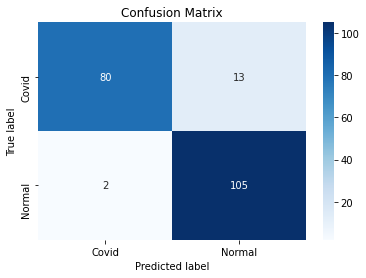

In [ ]:
cm = cf_matrix

import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

In [ ]:
print("Evaluate on test data")
results = model.evaluate(valX, valY, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
7/7 [==============================] - 6s 110ms/step - loss: 0.5810 - accuracy: 0.9250
test loss, test acc: [0.5809599757194519, 0.925000011920929]


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/CLahe')

In [ ]:
import io 
path='/content/drive/MyDrive/testing/covid/IM00027.tif'
save_path='/content/drive/MyDrive/hasil test/covid4.tif'
with open(path, 'rb') as f:
    tif = Image.open(io.BytesIO(f.read()))
array=np.array(tif)
max_val=np.amax(array)
normalized=(array/max_val)
im = Image.fromarray(normalized)
im.save(save_path,'TIFF')

In [ ]:
width = 224
height = 224
dsize = (width, height)
image_testing = cv2.imread('/content/drive/MyDrive/hasil test/covid2.tif', -1)
image_testing = cv2.cvtColor(image_testing, cv2.COLOR_BGR2RGB)
image_testing = cv2.resize(image_testing,dsize)
image_testing = np.array(image_testing)
image_testing.shape

(224, 224, 3)

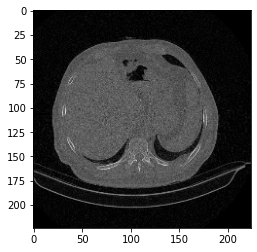

In [ ]:
plt.imshow(image_testing)


In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 224, 224, 3)


In [ ]:
encoder = LabelEncoder()
encoder.fit(test_generator.classes)
labels = encoder.transform(test_generator.classes)

In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(test_generator.class_indices)
print(encoder.classes_[output.argmax(axis=1)])

[[0.9866354  0.01336461]]
{'covid': 0, 'normal': 1}
[0]
